In [4]:
# Messing around with flow hashing to see how it influences throughput
# server: 612
# client: 614
# udp_sd_irqb --> first experiments run on startup.
# udp_sdfn_irqb --> change hashing algorithm to include ports.
# udp_sdfn_noirqb --> now turn off irqbalance.
# udp_sdfn_irqb --> ...and restore irqbalance.

In [5]:
import os
import re
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='theano', api_key='hkYRYxjyM0aAGA5nmGq1')

In [6]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [7]:
home = os.getcwd()
print(home)

/home/theano/mountpoint/tsch/mininetpipe/results/ethtool2


In [58]:
def load_datfile(fpath, proto):
    # Returns a dataframe
    df = pd.read_csv(fpath, 
                     index_col=False,
                     names=["ncli",proto])
    return df

In [78]:
results_files = ["udp_sd_irqb.txt",
                 "udp_sdfn_irqb.txt", # --> change hashing algorithm to include ports.
                 "udp_sd_noirqb.txt", # --> default hash, turn off irqbalance
                 "tcp_noirqb.txt",
                 "tcp_irqb.txt",
                 # "udp_sdfn_noirqb.txt"
                ]

In [91]:
gps = []

for fname in results_files:
    df = load_datfile(os.path.join(home, fname), fname)
    gps.append(df.groupby("ncli"))

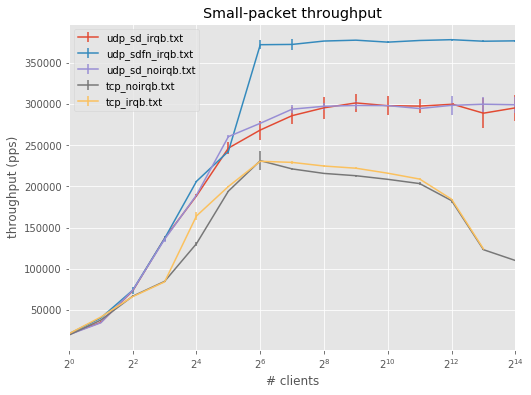

In [93]:
fig, ax = plt.subplots(figsize=(8,6))

for gp in gps:
    gp.mean().plot(ax=ax, yerr=gp.std())

ax.title.set_text("Small-packet throughput")

ax.set_xlabel("# clients")
ax.set_ylabel("throughput (pps)")

ax.set_xscale('log', basex=2)
#ax.set_yscale('log', basey=10)
        
ax.legend(loc=2)

plt.show()

In [77]:
fig = {
    'data': [
        {
            'x': gp.mean().index,
            'y': gp.mean()[gp.mean().columns[0]],
            'name': gp.mean().columns[0],
            'error_y': dict(
                type='data',
                array=gp.std()[gp.std().columns[0]],
                visible=True),
        } for gp in gps
    ],
    'layout': {
        'xaxis': {'title': '# clients', 'type': 'log'},
        'yaxis': {'title': 'throughput (pps)'},
        'title': 'Small-packet throughput'
    }
}

py.iplot(fig, filename="somefilename")